[]
--- Simulación en tiempo t=1 ---


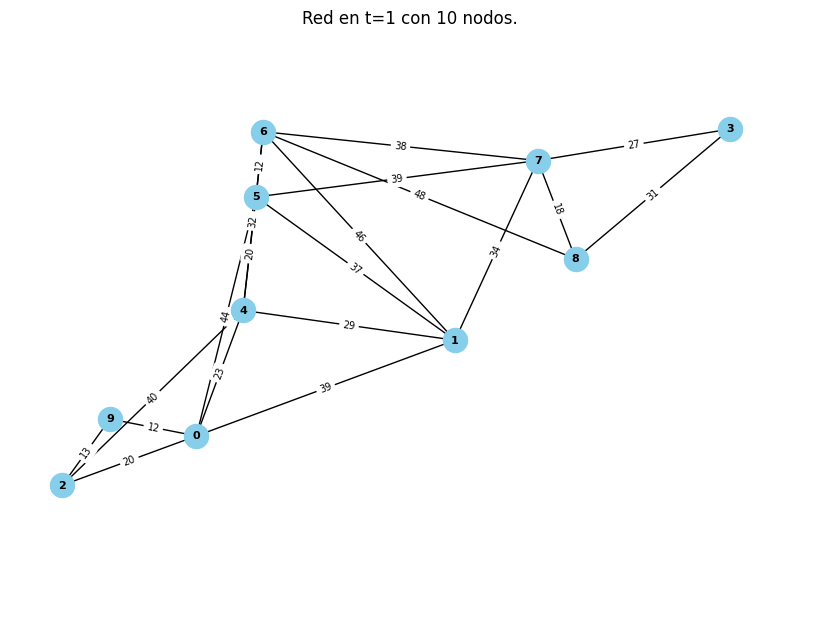

Ruta más corta de 0 a 9: ['0', '9'], Distancia: 12
Latencia: 0.03
[[0, 1, 39], [0, 2, 20], [0, 4, 23], [0, 5, 44], [0, 9, 12], [1, 4, 29], [1, 5, 37], [1, 6, 46], [1, 7, 34], [2, 4, 40], [2, 9, 13], [3, 7, 27], [3, 8, 31], [4, 5, 20], [4, 6, 32], [5, 6, 12], [5, 7, 39], [6, 7, 38], [6, 8, 48], [7, 8, 18]]
--- Simulación en tiempo t=2 ---


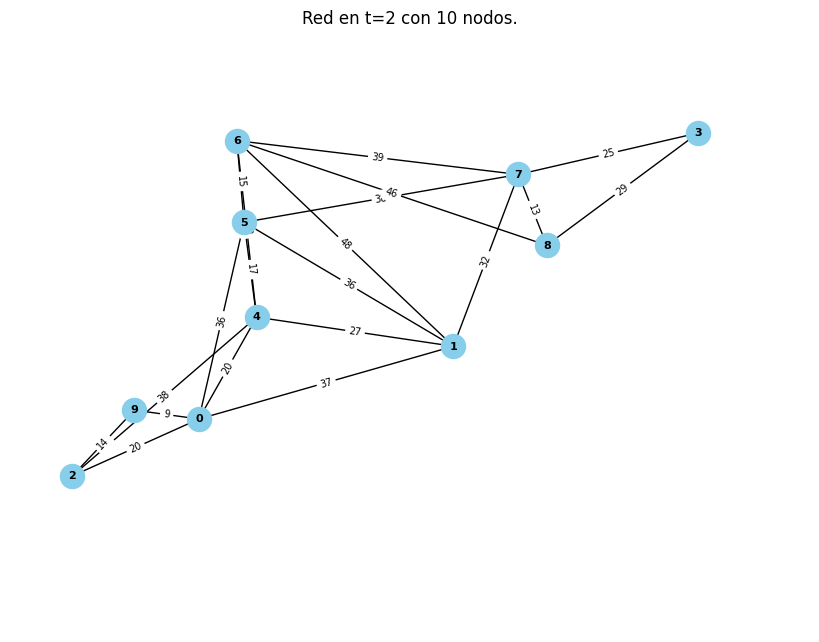

Ruta más corta de 0 a 9: ['0', '9'], Distancia: 9
Latencia: 0.03


In [37]:
# En tu Jupyter Notebook

# Importaciones
from Graph import Graph
from Raro import *
import networkx as nx
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# --- Configuración de la Simulación ---
CANTIDAD_NODOS_INICIAL = 10
AREA_X, AREA_Y = 100, 100
TOLERANCIA_CONEXION = 50
CONEXIONES_MAX_NODO = 5

# Parámetros del Modelo de Movilidad (RWP)
VELOCIDAD_MIN = 1
VELOCIDAD_MAX = 5
TIEMPO_PAUSA = 5 

#=================DATOS PARA METRICAS

LATENCIA = []
# Tiempos de simulación
TIEMPO = 0

TIEMPO_TOTAL_SIMULACION = 2 
TIME_STEP = 1 # Avance del tiempo por paso

# --- Inicialización ---
nodos = inicializar_nodos(CANTIDAD_NODOS_INICIAL, AREA_X, AREA_Y, VELOCIDAD_MIN, VELOCIDAD_MAX, TIEMPO_PAUSA)
enlaces = []

# --- Bucle Principal de la Simulación ---
for t in range(TIEMPO_TOTAL_SIMULACION):

    TIEMPO +=1
    print(enlaces)    
    # Mover cada nodo según modelo random waypoint
    for nodo in nodos:
        nodo.move_step(TIME_STEP)
        
    #Recalcular conexiones basadas en las nuevas posiciones
    generar_conexiones(nodos, enlaces, TOLERANCIA_CONEXION, CONEXIONES_MAX_NODO - 1)

    G = crear_grafo(nodos, enlaces) # Grafo para visualización
    g = Graph(len(nodos))           # Grafo para Dijkstra
    
    for i in range(len(nodos)):
        g.add_vertex_data(i, str(i))
    for n1, n2, peso in enlaces:
        g.add_edge(n1, n2, peso)
        
    print(f"--- Simulación en tiempo t={TIEMPO} ---")
    visualizar_red(G, AREA_X, AREA_Y, f"Red en t={TIEMPO} con {CANTIDAD_NODOS_INICIAL} nodos.")
    plt.show()

    try:
        distancia, ruta = g.dijkstra('0', str(len(nodos)-1))
        lat = latencia(ruta)
        LATENCIA.append((lat,len(nodos)))
        print(f"Ruta más corta de 0 a {len(nodos)-1}: {ruta}, Distancia: {distancia}")
        print(f"Latencia: {lat}")
    except (ValueError, IndexError) as e:
        print(f"No se encontró ruta entre 0 y {len(nodos)-1}: {e}")



    time.sleep(0.1) 


--- Simulación Extendida en tiempo t=3 ---


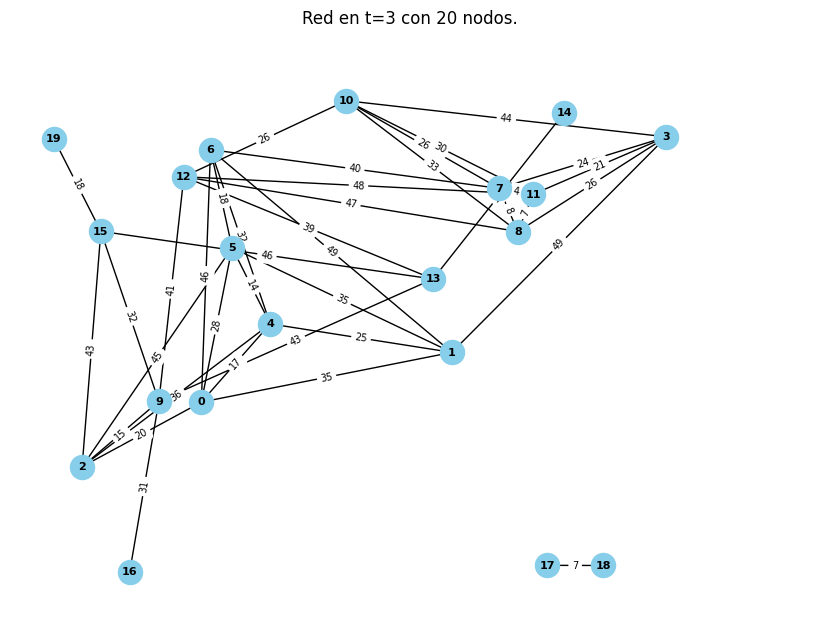

Ruta más corta de 0 a 19: ['0', '2', '15', '19'], Distancia: 81
Latencia: 0.076

--- Simulación Extendida en tiempo t=4 ---


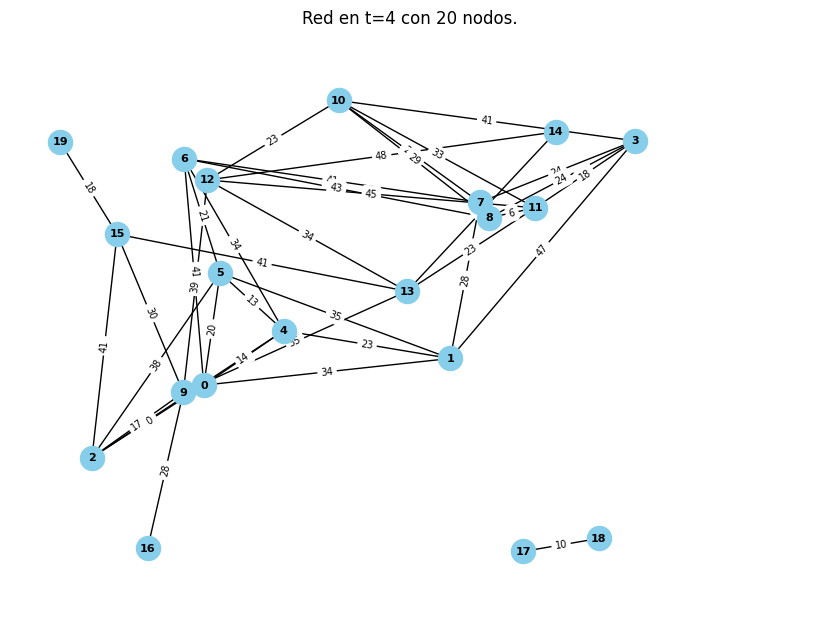

Ruta más corta de 0 a 19: ['0', '2', '15', '19'], Distancia: 79
Latencia: 0.076


In [38]:
NODOS_A_ANADIR = 10
TIEMPO_SIMULACION_EXTRA = 2

# --- Añadir nuevos nodos a la lista existente ---
agregar_nodos(nodos, NODOS_A_ANADIR, AREA_X, AREA_Y, VELOCIDAD_MIN, VELOCIDAD_MAX, TIEMPO_PAUSA)
cantidad_total_nodos = len(nodos)

for t in range(TIEMPO_SIMULACION_EXTRA):
    TIEMPO +=1
    
    # Mover TODOS los nodos (los antiguos y los nuevos)
    for nodo in nodos:
        nodo.move_step(TIME_STEP)
        
    generar_conexiones(nodos, enlaces, TOLERANCIA_CONEXION, CONEXIONES_MAX_NODO - 1)

    # Recrear los grafos para reflejar el nuevo número de nodos
    G = crear_grafo(nodos, enlaces)
    g = Graph(cantidad_total_nodos) 
    
    for i in range(len(nodos)):
        g.add_vertex_data(i, str(i))
    for n1, n2, peso in enlaces:
        g.add_edge(n1, n2, peso)

    # --- Salida para este tick ---
    print(f"\n--- Simulación Extendida en tiempo t={TIEMPO} ---")
    visualizar_red(G, AREA_X, AREA_Y, f"Red en t={TIEMPO} con {cantidad_total_nodos} nodos.")
    plt.show()

    try:
        # El nodo destino ahora es el nuevo último nodo de la lista
        nodo_destino_id = str(cantidad_total_nodos - 1)
        distancia, ruta = g.dijkstra('0', nodo_destino_id)
        lat = latencia(ruta)
        LATENCIA.append((lat,len(nodos)))
        print(f"Ruta más corta de 0 a {nodo_destino_id}: {ruta}, Distancia: {distancia}")
        print(f"Latencia: {lat}")
    except (ValueError, IndexError) as e:
        print(f"No se encontró ruta entre 0 y {nodo_destino_id}: {e}")

    time.sleep(0.1) 


--- Simulación Extendida en tiempo t=5 ---


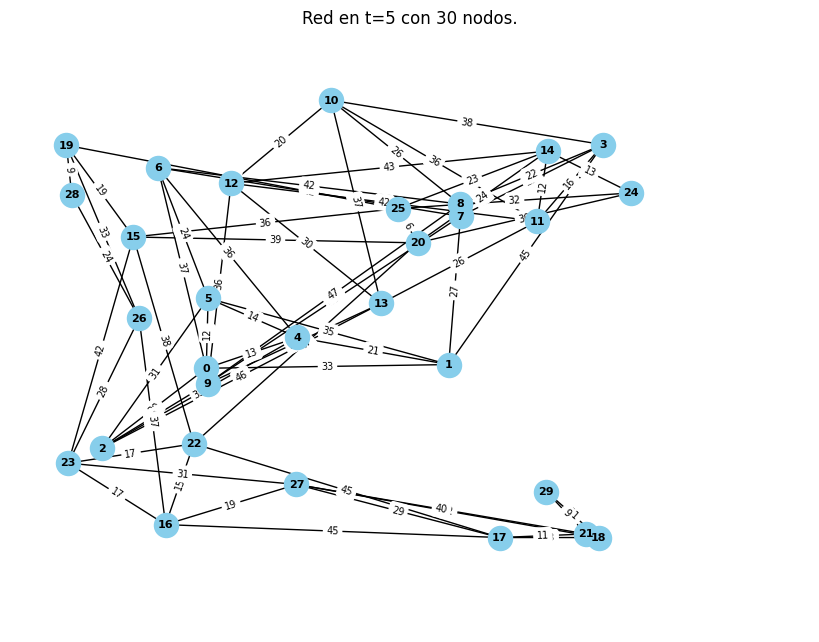

Ruta más corta de 0 a 29: ['0', '2', '9', '13', '11', '14', '20', '22', '17', '21', '29'], Distancia: 239
Latencia: 0.23700000000000002

--- Simulación Extendida en tiempo t=6 ---


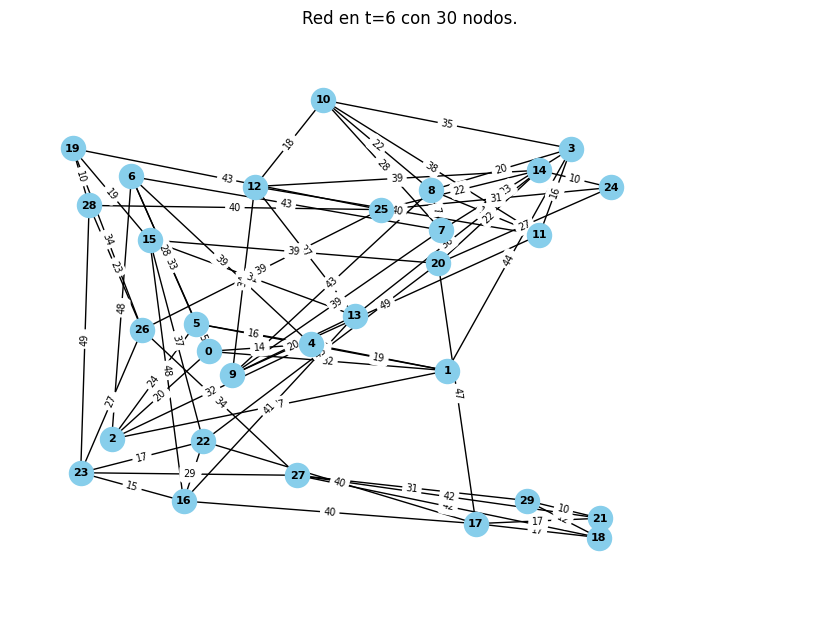

Ruta más corta de 0 a 29: ['0', '6', '7', '9', '13', '16', '17', '21', '29'], Distancia: 243
Latencia: 0.191


In [39]:
NODOS_A_ANADIR = 10
TIEMPO_SIMULACION_EXTRA = 2

# --- Añadir nuevos nodos a la lista existente ---
agregar_nodos(nodos, NODOS_A_ANADIR, AREA_X, AREA_Y, VELOCIDAD_MIN, VELOCIDAD_MAX, TIEMPO_PAUSA)
cantidad_total_nodos = len(nodos)

for t in range(TIEMPO_SIMULACION_EXTRA):
    TIEMPO +=1
    
    # Mover TODOS los nodos (los antiguos y los nuevos)
    for nodo in nodos:
        nodo.move_step(TIME_STEP)
        
    generar_conexiones(nodos, enlaces, TOLERANCIA_CONEXION, CONEXIONES_MAX_NODO - 1)

    # Recrear los grafos para reflejar el nuevo número de nodos
    G = crear_grafo(nodos, enlaces)
    g = Graph(cantidad_total_nodos) 
    
    for i in range(len(nodos)):
        g.add_vertex_data(i, str(i))
    for n1, n2, peso in enlaces:
        g.add_edge(n1, n2, peso)

    # --- Salida para este tick ---
    print(f"\n--- Simulación Extendida en tiempo t={TIEMPO} ---")
    visualizar_red(G, AREA_X, AREA_Y, f"Red en t={TIEMPO} con {cantidad_total_nodos} nodos.")
    plt.show()

    try:
        # El nodo destino ahora es el nuevo último nodo de la lista
        nodo_destino_id = str(cantidad_total_nodos - 1)
        distancia, ruta = g.dijkstra('0', nodo_destino_id)
        lat = latencia(ruta)
        LATENCIA.append((lat,len(nodos)))
        print(f"Ruta más corta de 0 a {nodo_destino_id}: {ruta}, Distancia: {distancia}")
        print(f"Latencia: {lat}")
    except (ValueError, IndexError) as e:
        print(f"No se encontró ruta entre 0 y {nodo_destino_id}: {e}")

    time.sleep(0.1) 


--- Simulación Extendida en tiempo t=7 ---


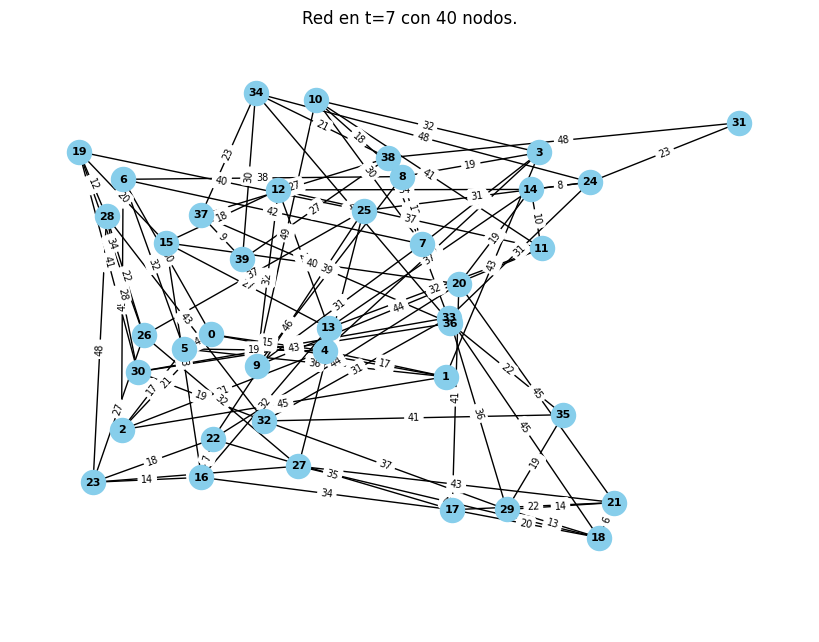

Ruta más corta de 0 a 39: ['0', '6', '8', '10', '11', '14', '24', '34', '39'], Distancia: 223
Latencia: 0.191

--- Simulación Extendida en tiempo t=8 ---


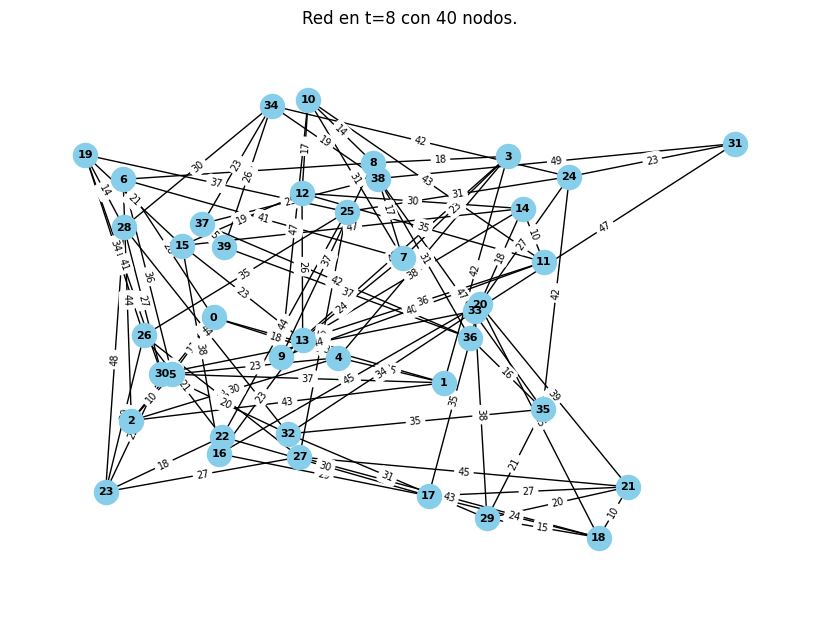

Ruta más corta de 0 a 39: ['0', '6', '8', '10', '12', '15', '19', '28', '34', '39'], Distancia: 203
Latencia: 0.214


In [40]:
NODOS_A_ANADIR = 10
TIEMPO_SIMULACION_EXTRA = 2

# --- Añadir nuevos nodos a la lista existente ---
agregar_nodos(nodos, NODOS_A_ANADIR, AREA_X, AREA_Y, VELOCIDAD_MIN, VELOCIDAD_MAX, TIEMPO_PAUSA)
cantidad_total_nodos = len(nodos)

for t in range(TIEMPO_SIMULACION_EXTRA):
    TIEMPO +=1
    
    # Mover TODOS los nodos (los antiguos y los nuevos)
    for nodo in nodos:
        nodo.move_step(TIME_STEP)
        
    generar_conexiones(nodos, enlaces, TOLERANCIA_CONEXION, CONEXIONES_MAX_NODO - 1)

    # Recrear los grafos para reflejar el nuevo número de nodos
    G = crear_grafo(nodos, enlaces)
    g = Graph(cantidad_total_nodos) 
    
    for i in range(len(nodos)):
        g.add_vertex_data(i, str(i))
    for n1, n2, peso in enlaces:
        g.add_edge(n1, n2, peso)

    # --- Salida para este tick ---
    print(f"\n--- Simulación Extendida en tiempo t={TIEMPO} ---")
    visualizar_red(G, AREA_X, AREA_Y, f"Red en t={TIEMPO} con {cantidad_total_nodos} nodos.")
    plt.show()

    try:
        # El nodo destino ahora es el nuevo último nodo de la lista
        nodo_destino_id = str(cantidad_total_nodos - 1)
        distancia, ruta = g.dijkstra('0', nodo_destino_id)
        lat = latencia(ruta)
        LATENCIA.append((lat,len(nodos)))
        print(f"Ruta más corta de 0 a {nodo_destino_id}: {ruta}, Distancia: {distancia}")
        print(f"Latencia: {lat}")
    except (ValueError, IndexError) as e:
        print(f"No se encontró ruta entre 0 y {nodo_destino_id}: {e}")

    time.sleep(0.1) 


--- Simulación Extendida en tiempo t=9 ---


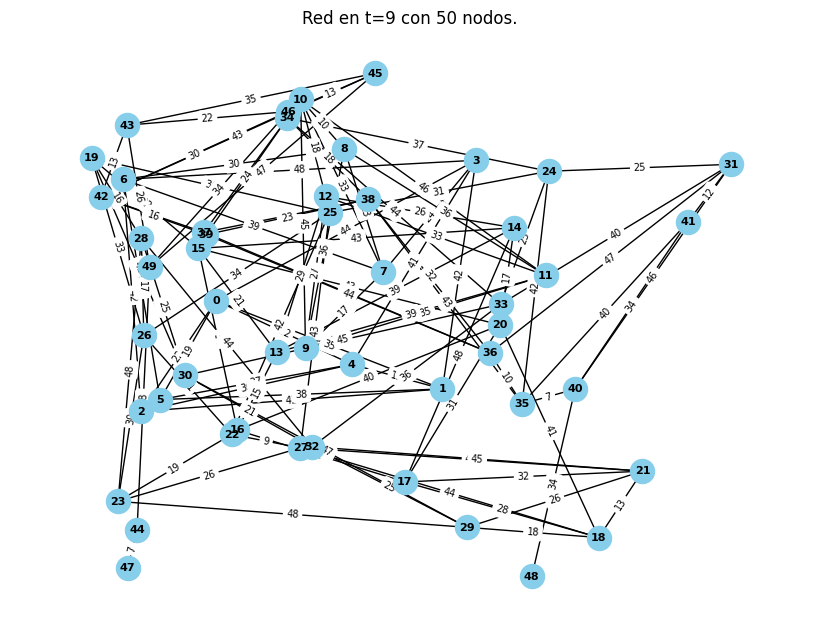

Ruta más corta de 0 a 49: ['0', '3', '7', '9', '12', '13', '16', '22', '25', '24', '34', '37', '42', '43', '49'], Distancia: 344
Latencia: 0.329

--- Simulación Extendida en tiempo t=10 ---


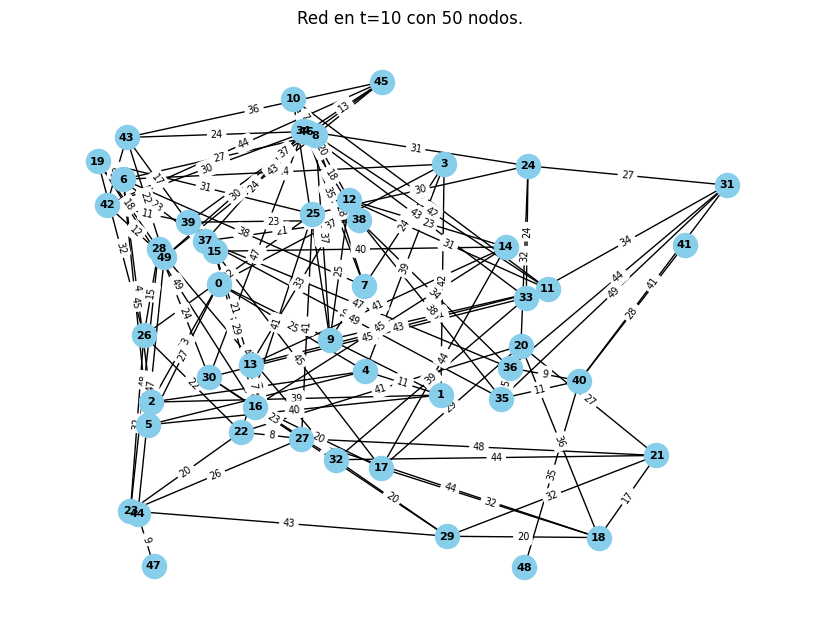

Ruta más corta de 0 a 49: ['0', '3', '7', '9', '12', '13', '16', '17', '20', '24', '34', '37', '39', '42', '49'], Distancia: 299
Latencia: 0.329


In [45]:
NODOS_A_ANADIR = 10
TIEMPO_SIMULACION_EXTRA = 2

# --- Añadir nuevos nodos a la lista existente ---
agregar_nodos(nodos, NODOS_A_ANADIR, AREA_X, AREA_Y, VELOCIDAD_MIN, VELOCIDAD_MAX, TIEMPO_PAUSA)
cantidad_total_nodos = len(nodos)

for t in range(TIEMPO_SIMULACION_EXTRA):
    TIEMPO +=1
    
    # Mover TODOS los nodos (los antiguos y los nuevos)
    for nodo in nodos:
        nodo.move_step(TIME_STEP)
        
    generar_conexiones(nodos, enlaces, TOLERANCIA_CONEXION, CONEXIONES_MAX_NODO - 1)

    # Recrear los grafos para reflejar el nuevo número de nodos
    G = crear_grafo(nodos, enlaces)
    g = Graph(cantidad_total_nodos) 
    
    for i in range(len(nodos)):
        g.add_vertex_data(i, str(i))
    for n1, n2, peso in enlaces:
        g.add_edge(n1, n2, peso)

    # --- Salida para este tick ---
    print(f"\n--- Simulación Extendida en tiempo t={TIEMPO} ---")
    visualizar_red(G, AREA_X, AREA_Y, f"Red en t={TIEMPO} con {cantidad_total_nodos} nodos.")
    plt.show()

    try:
        # El nodo destino ahora es el nuevo último nodo de la lista
        nodo_destino_id = str(cantidad_total_nodos - 1)
        distancia, ruta = g.dijkstra('0', nodo_destino_id)
        lat = latencia(ruta)
        LATENCIA.append((lat,len(nodos)))
        print(f"Ruta más corta de 0 a {nodo_destino_id}: {ruta}, Distancia: {distancia}")
        print(f"Latencia: {lat}")
    except (ValueError, IndexError) as e:
        print(f"No se encontró ruta entre 0 y {nodo_destino_id}: {e}")

    time.sleep(0.1) 

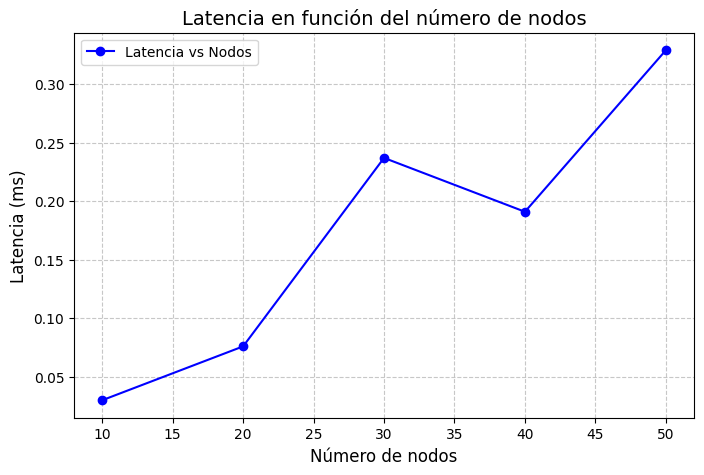

In [46]:
n_nodos = [d[1] for d in LATENCIA[::2]]
latencias = [d[0] for d in LATENCIA[::2]]

plt.figure(figsize=(8, 5))  
plt.plot(n_nodos, latencias, marker='o', linestyle='-', color='b', label='Latencia vs Nodos')

plt.title("Latencia en función del número de nodos", fontsize=14)
plt.xlabel("Número de nodos", fontsize=12)
plt.ylabel("Latencia (ms)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()

In [42]:
print(LATENCIA)

[(0.03, 10), (0.03, 10), (0.076, 20), (0.076, 20), (0.23700000000000002, 30), (0.191, 30), (0.191, 40), (0.214, 40)]
